# First Name: Shubham
# Last Name: Dutt

# Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

# Read in champagne.CSV File

In [6]:
champagne = pd.read_csv("champagne.csv")
champagne.head()

,Month,champagne
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


# Data Management

# convert champagne['Month'] to datetime format

In [9]:
from datetime import datetime
champagne['Month'] = pd.to_datetime(champagne['Month'], format='%Y-%m')
champagne.head()

,Month,champagne
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


# Set 'Month' column as index

In [11]:
champagne.set_index('Month', inplace=True)
champagne.head()

,champagne
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


# Convert champagne['champagne'] to numeric and print the description of champagne['champagne'] column

In [20]:
champagne['champagne'] = champagne['#champagne'] = pd.to_numeric(champagne['champagne'])
print(champagne.describe())

          champagne    #champagne
count    105.000000    105.000000
mean    4761.152381   4761.152381
std     2553.502601   2553.502601
min     1413.000000   1413.000000
25%     3113.000000   3113.000000
50%     4217.000000   4217.000000
75%     5221.000000   5221.000000
max    13916.000000  13916.000000


# print the index of champagne

In [23]:
champagne.index

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01',
               ...
               '1971-12-01', '1972-01-01', '1972-02-01', '1972-03-01',
               '1972-04-01', '1972-05-01', '1972-06-01', '1972-07-01',
               '1972-08-01', '1972-09-01'],
              dtype='datetime64[ns]', name='Month', length=105, freq=None)

# Print rows from 1965-07-01 to 1965-12-01

In [26]:
champagne['1965-07-01' : '1965-12-01']

,champagne,#champagne
Month,,
1965-07-01,3028,3028
1965-08-01,1759,1759
1965-09-01,3595,3595
1965-10-01,4474,4474
1965-11-01,6838,6838
1965-12-01,8357,8357


# Print from begining of data till 1966-07-01

In [29]:
champagne[:'1966-07-01']

,champagne,#champagne
Month,,
1964-01-01,2815,2815
1964-02-01,2672,2672
1964-03-01,2755,2755
1964-04-01,2721,2721
1964-05-01,2946,2946
1964-06-01,3036,3036
1964-07-01,2282,2282
1964-08-01,2212,2212
1964-09-01,2922,2922


# Print data for the entire year 1972

In [32]:
champagne.loc['1972']

,champagne,#champagne
Month,,
1972-01-01,4348,4348
1972-02-01,3564,3564
1972-03-01,4577,4577
1972-04-01,4788,4788
1972-05-01,4618,4618
1972-06-01,5312,5312
1972-07-01,4298,4298
1972-08-01,1413,1413
1972-09-01,5877,5877


# 1. Plot champagne Time Series

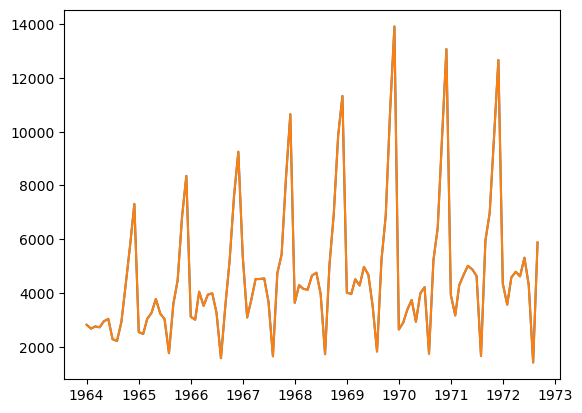

In [35]:
%matplotlib inline
plt.plot(champagne)

# Create a column called 'Month' that is just the month of sale

In [38]:
champagne['Month'] = champagne.index.month
champagne.head()

,champagne,#champagne,Month
Month,,,
1964-01-01,2815,2815,1
1964-02-01,2672,2672,2
1964-03-01,2755,2755,3
1964-04-01,2721,2721,4
1964-05-01,2946,2946,5


# Box plot of monthly champange sale

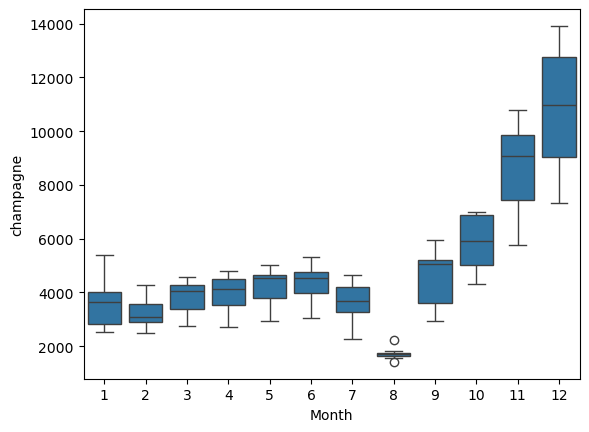

In [46]:
import seaborn as sns
ax = sns.boxplot(data = champagne, x='Month',y='champagne')

# 2. Stationarity  - Check

In [49]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
 
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)  

# Perform test_stationarity on champagne sale

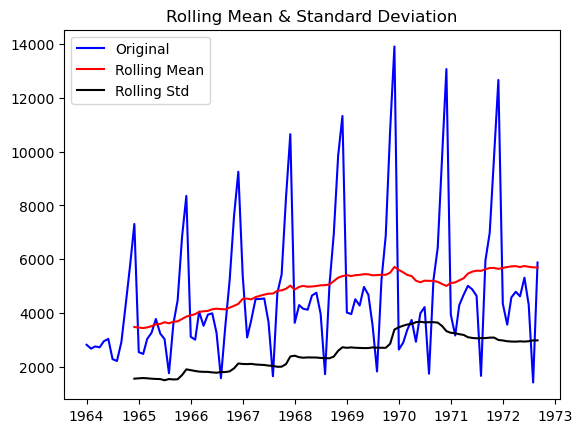

In [62]:
test_stationarity(champagne['#champagne'])

In [64]:
from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller test:
def test_Dickey_Fuller(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

# Perform test_Dickey_Fuller on champagne sale

In [66]:
test_Dickey_Fuller(champagne['#champagne'])

Results of Dickey-Fuller Test:
Test Statistic                 -1.833593
p-value                         0.363916
#Lags Used                     11.000000
Number of Observations Used    93.000000
Critical Value (1%)            -3.502705
Critical Value (5%)            -2.893158
Critical Value (10%)           -2.583637
dtype: float64


# Make Time Series Stationary

# Decomposing

# store the champagne sales time series as a new variable named 'ts' and plot the (ts)

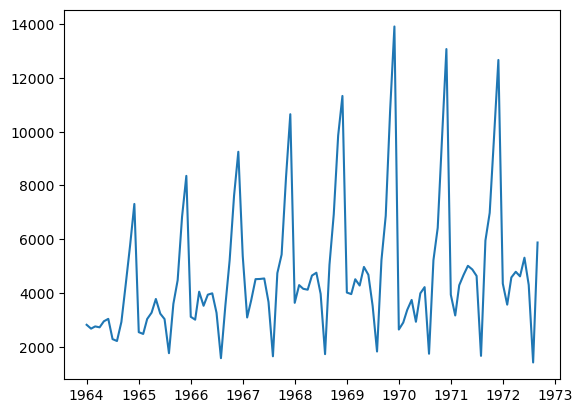

In [68]:
ts = champagne['#champagne']
plt.plot(ts)

# Decompose champagne sales (ts) to obtain trend, seasonal, residual
# plot 'Original' (ts)
# plot trend
# plot seasonality
# plot residuals

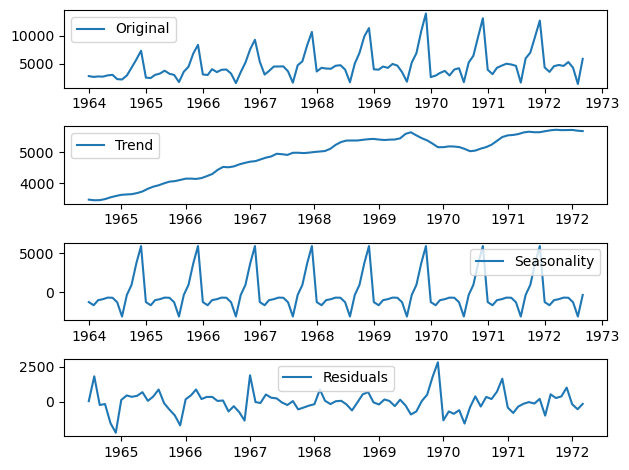

In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# Perform test_stationarity on residual of champagne sale

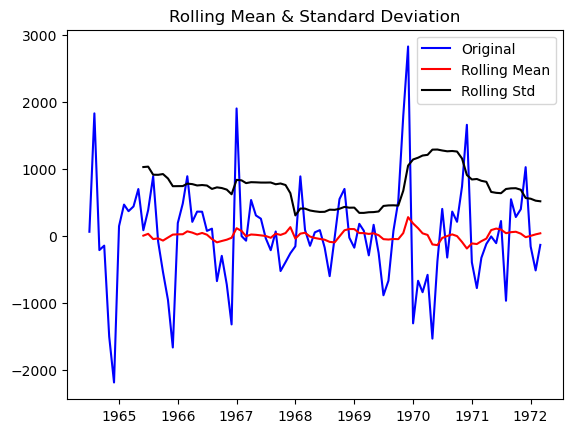

In [78]:
#use only residual data
ts_decompose = residual
ts_decompose.dropna(inplace=True)
test_stationarity(ts_decompose)

# Perform test_Dickey_Fuller on residual of champagne sale

In [81]:
test_Dickey_Fuller(ts_decompose)

Results of Dickey-Fuller Test:
Test Statistic                 -4.323381
p-value                         0.000405
#Lags Used                     11.000000
Number of Observations Used    81.000000
Critical Value (1%)            -3.513790
Critical Value (5%)            -2.897943
Critical Value (10%)           -2.586191
dtype: float64


# Plot ACF & PACF chart & find optimal parameter

In [136]:
from statsmodels.tsa.stattools import acf, pacf

# Obtain partical autocorrelation (pacf) and autocorrelation (acf)

In [139]:
ts_diff = ts - ts.shift()
ts_diff.dropna(inplace=True)
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')

# Plot  partical autocorrelation (pacf) and autocorrelation (acf)

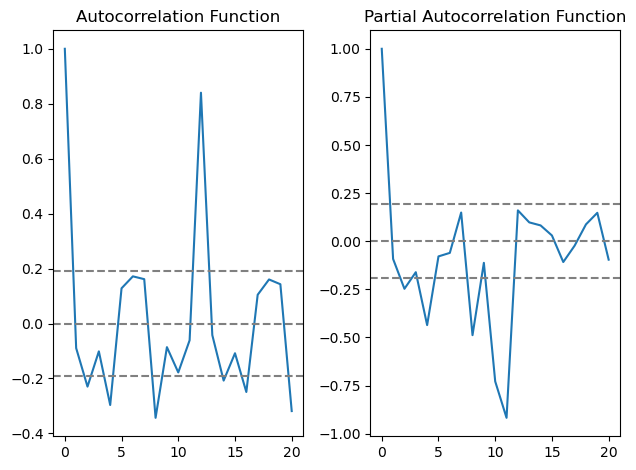

In [117]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# Build ARIMA model using ts using p and q values from acf and pacf

In [120]:
from statsmodels.tsa.arima.model import ARIMA

C:\Users\sunor\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sunor\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sunor\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


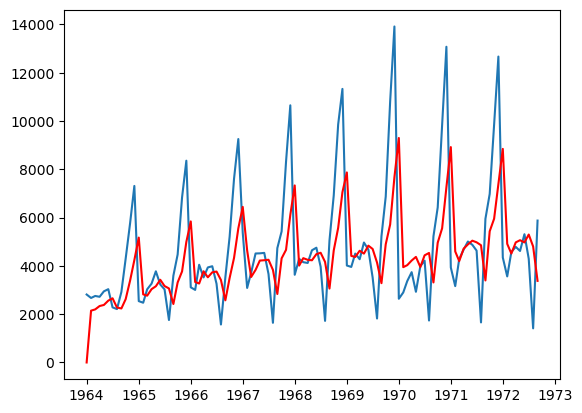

In [122]:
#ARIMA
model = ARIMA(ts, order=(1, 1, 1))  #(p,d,q)
results_ARIMA = model.fit()  
results_ARIMA.summary()

plt.plot(ts)
plt.plot(results_ARIMA.fittedvalues, color='red')

# Make predictions

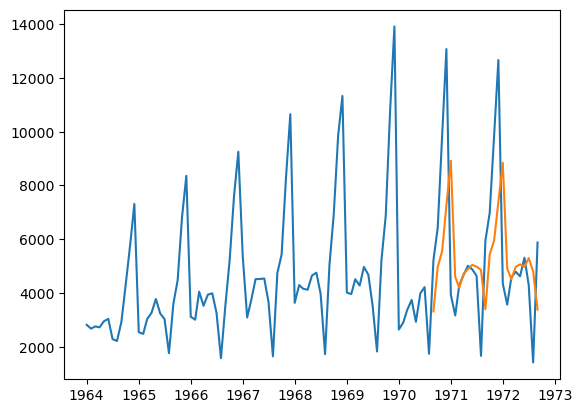

In [125]:
# Make predictions using ARIMA
ts_predict=results_ARIMA.predict(start=80,dynamic=False)

plt.plot(ts)
plt.plot(ts_predict)

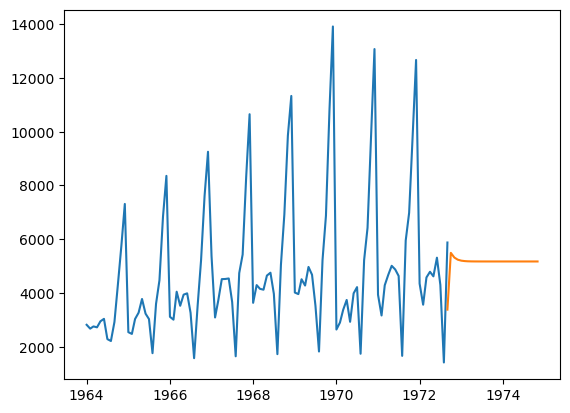

In [127]:
ts_predict=results_ARIMA.predict(start=104,end=130,dynamic=False)

plt.plot(ts)
plt.plot(ts_predict)

C:\Users\sunor\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sunor\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


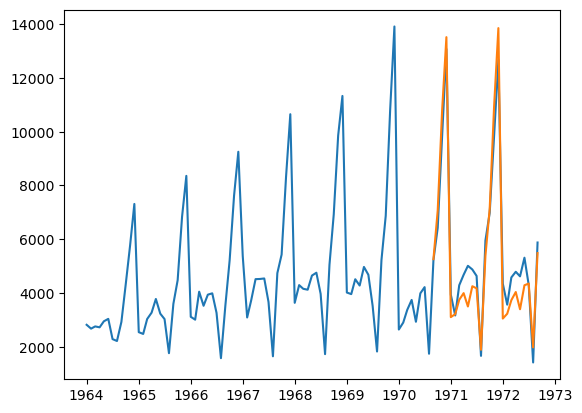

In [131]:
# Make predictions using SARIMAX
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(ts,order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
ts_predict_s=results.predict(start=80,dynamic=True)
plt.plot(ts)
plt.plot(ts_predict_s)

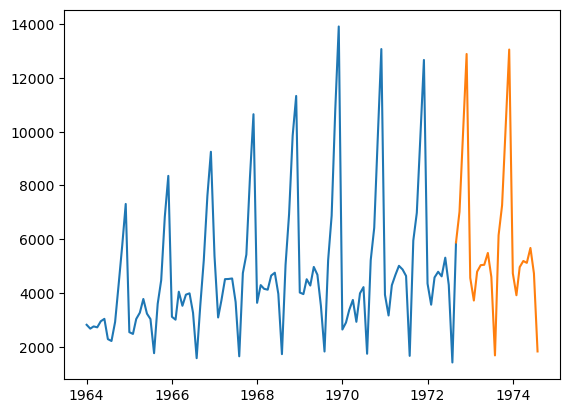

In [133]:
from pandas.tseries.offsets import DateOffset
future_dates=[champagne.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_dates_ts=pd.DataFrame(index=future_dates[1:],columns=champagne.columns)

future_dates_ts.tail()

future_ts=pd.concat([champagne,future_dates_ts])

future_ts['forecast'] = results.predict(start = 104, end = 130, dynamic= True)
plt.plot(ts)
plt.plot(future_ts['forecast'])